# Camera-to-channel unit conversion

### Imports

In [1]:
# Python standard library
import sys

# Scipy
import numpy as np
import matplotlib.pyplot as plt

# pore_stats specific
sys.path.append('/home/prestonh/Desktop/Research/pore_stats/lib/rp')
sys.path.append('/home/prestonh/Desktop/Research/pore_stats/lib/oi')
import optical_imaging as oi
import oi_file

### Load data

In [2]:
oi_fps = 50000.
oi_res_x = 512
oi_res_y = 288
oi_exp = 5.

In [3]:
date = '/3-27-2017'
particle = '/10um_ps'
device = '/17p5um_0'
index = '1'

oi_base_directory = '/home/prestonh/Desktop/Research/cancer_cells/data'
oi_vid_filepath = oi_base_directory + date + particle + device + '/oi/bin/test_camera_'+index
oi_events_filepath = oi_base_directory + date + particle + device + '/oi/events/test_camera_' + index + '_events.json'

oi_vid = oi_file.Raw(oi_vid_filepath, oi_res_x, oi_res_y, oi_fps, oi_exp)
oi_events = oi_file.open_event_file_json(oi_events_filepath)

/home/prestonh/Desktop/Research/pore_stats/lib/oi/optical_imaging.py:62: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if pixels != None:


### Create stage

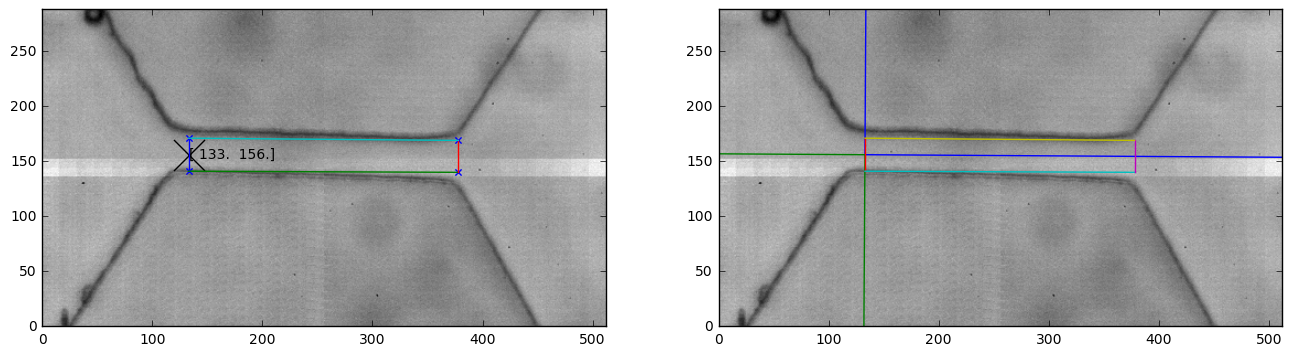

In [4]:
template_frame = oi_vid.get_frame(0)

c0 = [133,171]
c1 = [133,141]
c2 = [378,140]
c3 = [378,169]


stage = oi.Stage(template_frame, c0, c1, c2, c3)
stage.plot_stage()

### Look at trajectory in channel coordinates for an event

In [5]:
# Set event
oi_event = oi_events[0]

# Get event detection coordinates
tfs = oi_event.get_tf()         # This gets a list of the frame indices of the event's detections
x_pixels = oi_event.get_px()    #  The x-position (in pixels) of the particle in each frame
y_pixels = oi_event.get_py()    #  y-position in pixels of the particle in each frame

# Convert to channel coordinates
xcs, ycs = stage.get_channel_coordinates(x_pixels, y_pixels)


# Convert from pixels to microns
stage._length_microns = 150.
xcs = stage.pixels_to_meters(xcs)
ycs = stage.pixels_to_meters(ycs)

### Plot to demonstrate conversion

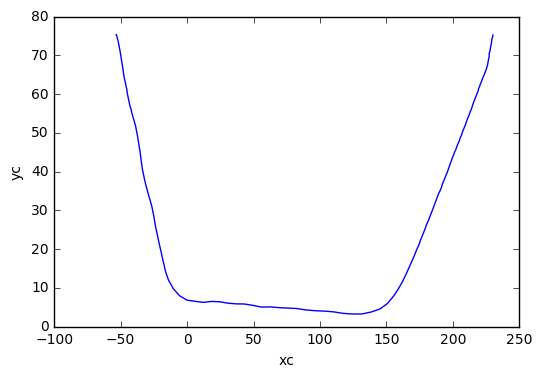

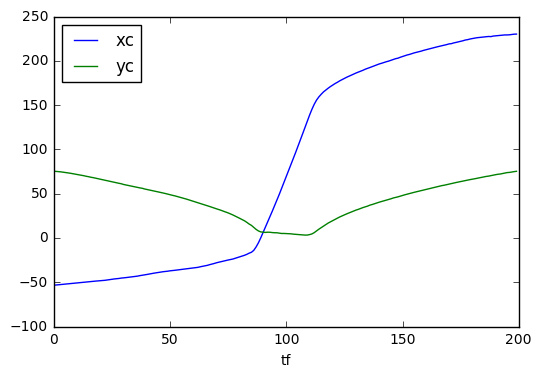

In [6]:
plt.plot(xcs, ycs)
plt.xlabel('xc')
plt.ylabel('yc')
plt.show()

plt.plot(tfs, xcs, label = 'xc')
plt.plot(tfs, ycs, label = 'yc')
plt.xlabel('tf')
plt.legend(loc = 'upper left')
plt.show()